In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [28]:
train_data, test_data = tf.keras.datasets.cifar10.load_data()
label_names = dict(zip(range(10),['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']))
print(label_names)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [29]:
print(train_data[0].shape)
print(train_data[1].shape)
print(test_data[0].shape)
print(test_data[1].shape)

train_img,train_label = train_data
train_img = train_img[:5000]
train_label = train_label[:5000]

test_img, test_label = test_data
test_img = test_img[:1000]
test_label = test_label[:1000]

train_img = train_img.astype('float32')/255.0
test_img = test_img.astype('float32')/255.0

print(train_img.shape)
del train_data, test_data

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(5000, 32, 32, 3)


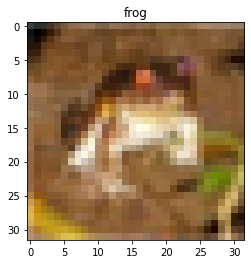

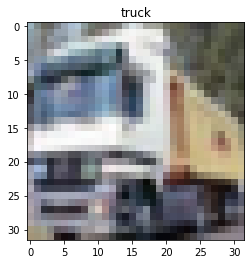

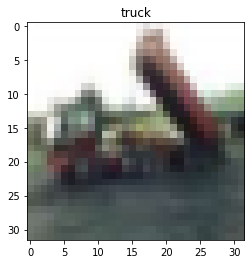

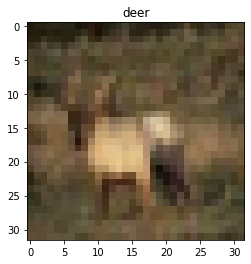

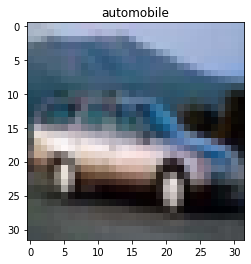

In [30]:
for i in range(5):
    plt.figure()
    plt.title(label_names[train_label[i].item()])
    plt.imshow(train_img[i])

In [31]:
inceptionv3 = tf.keras.applications.InceptionV3(
            include_top=False, weights='imagenet',input_shape=(299,299,3))
# include_top = False means we drop the final layers of InceptionV3 model and add our custom layers
inceptionv3.trainable=False
# we freeze the weights so we don't retrain the entire InceptionV3 model

161[0][0]             
__________________________________________________________________________________________________
conv2d_165 (Conv2D)             (None, 17, 17, 192)  147456      average_pooling2d_15[0][0]       
__________________________________________________________________________________________________
batch_normalization_154 (BatchN (None, 17, 17, 192)  576         conv2d_156[0][0]                 
__________________________________________________________________________________________________
batch_normalization_157 (BatchN (None, 17, 17, 192)  576         conv2d_159[0][0]                 
__________________________________________________________________________________________________
batch_normalization_162 (BatchN (None, 17, 17, 192)  576         conv2d_164[0][0]                 
__________________________________________________________________________________________________
batch_normalization_163 (BatchN (None, 17, 17, 192)  576         conv2d_165[0][0]     

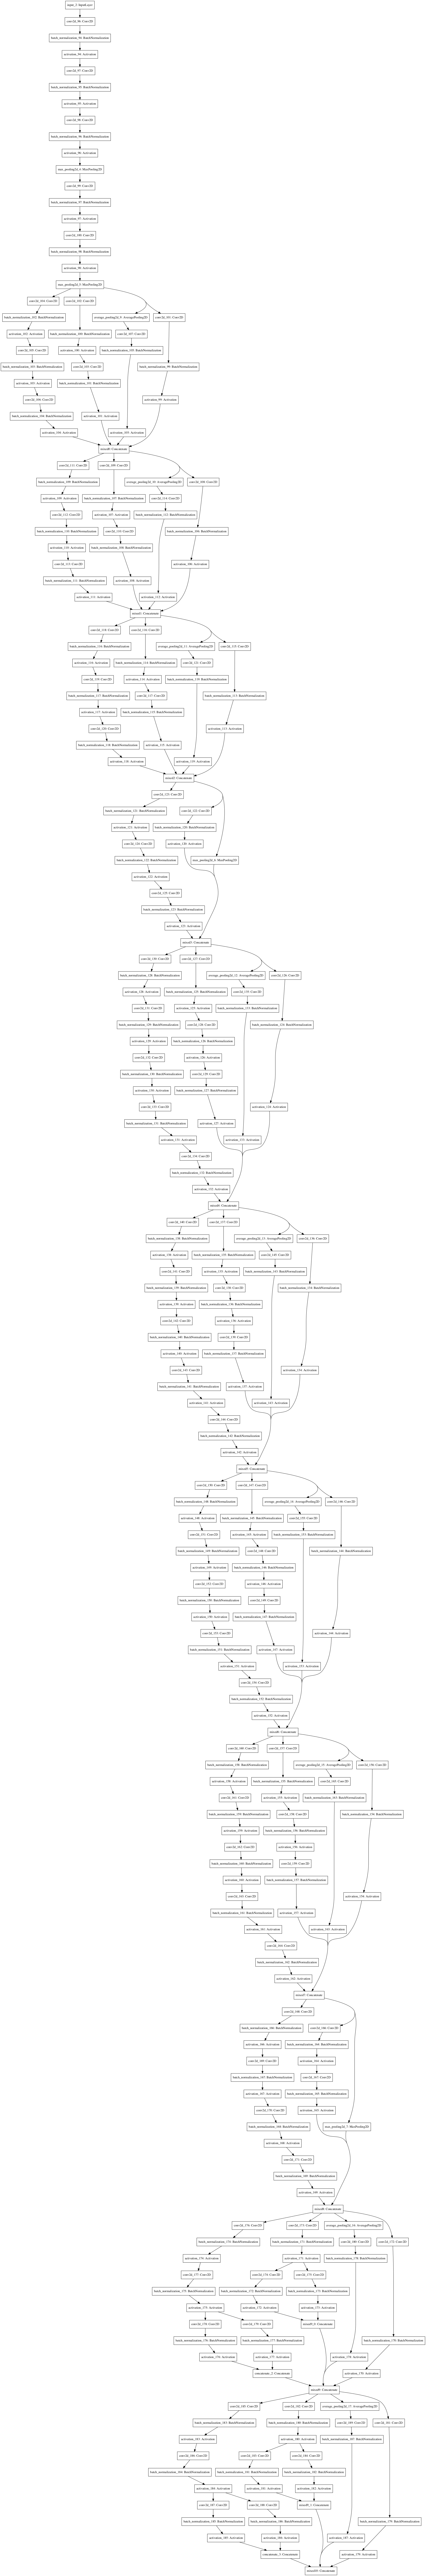

In [32]:
inceptionv3.summary()
tf.keras.utils.plot_model(inceptionv3)

In [33]:
ourModel = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(299,299,interpolation='nearest',input_shape=(32,32,3)),
    inceptionv3,
    tf.keras.layers.Conv2D(256, (1,1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
ourModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_2 (Resizing)        (None, 299, 299, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 8, 8, 256)         524544    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [35]:
ourModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [36]:
history = ourModel.fit(train_img, train_label, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
32/32 [==============================] - 260s 8s/step - loss: 2.4986 - sparse_categorical_accuracy: 0.2902 - val_loss: 0.9798 - val_sparse_categorical_accuracy: 0.6660
Epoch 2/3
32/32 [==============================] - 259s 8s/step - loss: 0.6861 - sparse_categorical_accuracy: 0.7631 - val_loss: 0.9131 - val_sparse_categorical_accuracy: 0.7210
Epoch 3/3
32/32 [==============================] - 256s 8s/step - loss: 0.5092 - sparse_categorical_accuracy: 0.8320 - val_loss: 0.7043 - val_sparse_categorical_accuracy: 0.7780


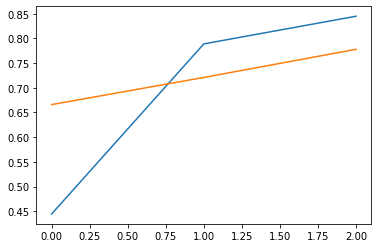

In [37]:
accs = history.history['sparse_categorical_accuracy']
val_accs = history.history['val_sparse_categorical_accuracy']
plt.figure()
plt.plot(range(len(accs)),accs)
plt.plot(range(len(val_accs)),val_accs)

In [38]:
loss, acc = ourModel.evaluate(test_img, test_label)
print(loss, acc)

32/32 [==============================] - 53s 2s/step - loss: 0.6348 - sparse_categorical_accuracy: 0.7970
0.6348481178283691 0.796999990940094


In [39]:
pred = ourModel.predict(test_img)
pred.shape

(1000, 10)

In [40]:
pred = np.argmax(pred,axis=-1)

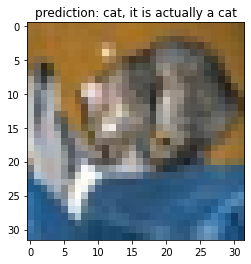

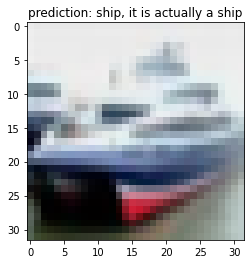

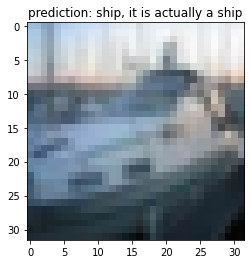

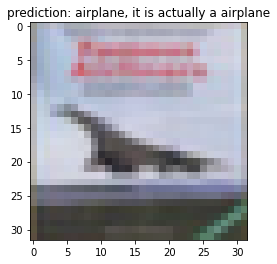

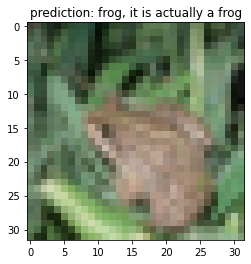

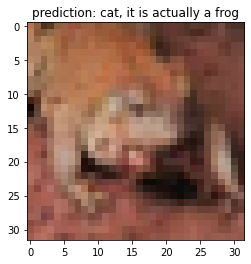

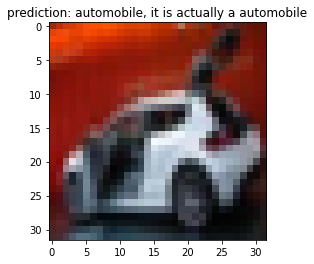

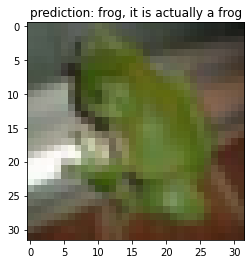

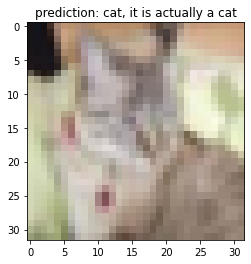

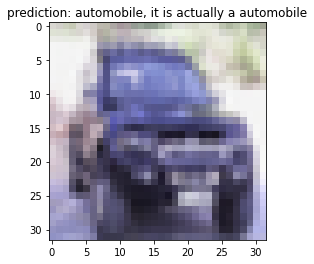

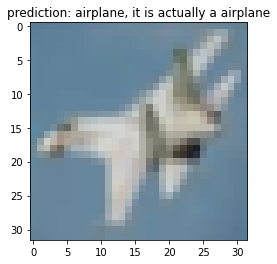

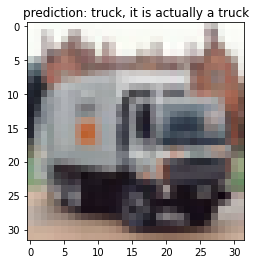

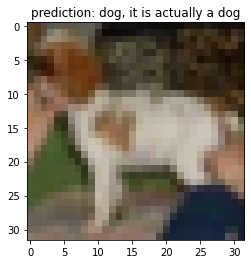

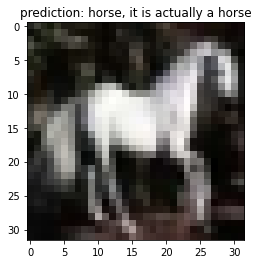

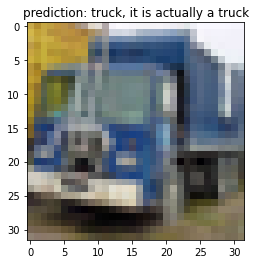

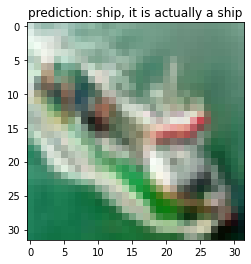

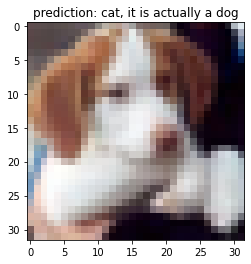

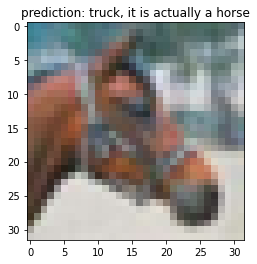

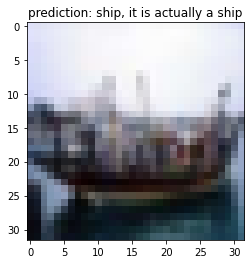

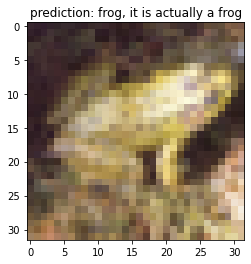

In [41]:
for i in range(20):
    plt.figure()
    plt.title(f'prediction: {label_names[pred[i]]}, it is actually a {label_names[test_label[i][0]]}')
    plt.imshow(test_img[i])